# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import pprint
from scipy.stats import linregress
from matplotlib import cm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# lists to hold reponse info
city_name = []	
lat	 = []	
lng  = []	
max_temp     = []		
humidity	 = []	
cloudiness   = []	
wind_speed	 = []	
country      = []
country_date = []	

# Loop through the list of cities and perform a request for data on each
i = 1

print("Beginning Data Retrieval")     
print("--------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {i} City Numer: {response['id']} | {response['name']}")
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        country_date.append(response['dt'])
                
    except (KeyError, IndexError): # response['cod'] == '404':
        print(f"City({city}) not found. Skipping....") 
    i+=1
print("--------------------------------")
print("Data Retrieval Complete")      
print("--------------------------------")  

Beginning Data Retrieval
--------------------------------
Processing Record 1 City Numer: 934322 | Mahébourg
Processing Record 2 City Numer: 5364271 | Laguna
Processing Record 3 City Numer: 5855927 | Hilo
Processing Record 4 City Numer: 4036284 | Alofi
Processing Record 5 City Numer: 3466704 | Castro
Processing Record 6 City Numer: 3893726 | Constitución
Processing Record 7 City Numer: 5106841 | Albany
Processing Record 8 City Numer: 3355672 | Lüderitz
Processing Record 9 City Numer: 98182 | Baghdad
Processing Record 10 City Numer: 2110227 | Butaritari
Processing Record 11 City Numer: 3833367 | Ushuaia
Processing Record 12 City Numer: 1649150 | Bengkulu
Processing Record 13 City Numer: 3366880 | Hermanus
Processing Record 14 City Numer: 2174444 | Bowen
Processing Record 15 City Numer: 5977046 | Hornepayne
Processing Record 16 City Numer: 5880054 | Barrow
Processing Record 17 City Numer: 1106677 | Bambous Virieux
Processing Record 18 City Numer: 1794209 | Simao
City(saleaula) not found.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert Raw Data to DataFrame by zipping the lists created in for loop
city_data_df = pd.DataFrame(list(zip(city_name,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,country_date)),columns =['City','Lat','Lng', 'Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

# Export the city data into a .csv.
city_data_df.to_csv(output_data_file,index_label="Index")

# Display the DataFrame
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,61.09,77,100,15.82,ES,1624133145
1,hobart,-42.8794,147.3294,47.01,92,90,0.00,AU,1624132870
2,ostrovnoy,68.0531,39.5131,48.52,80,39,8.03,RU,1624133145
3,voh,-20.9667,164.7000,70.30,87,98,2.98,NC,1624133146
4,isangel,-19.5500,169.2667,76.21,85,72,6.11,VU,1624133146
...,...,...,...,...,...,...,...,...,...
573,cayenne,4.9333,-52.3333,86.04,75,75,1.01,GF,1624133529
574,boli,45.7667,130.5167,53.04,97,12,4.34,CN,1624133529
575,pangai,-19.8000,-174.3500,76.12,75,18,12.28,TO,1624133530
576,buala,-8.1450,159.5921,79.83,80,75,4.88,SB,1624133530


In [5]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,18.433072,18.110869,68.311401,70.866782,56.524221,7.926246,1.624133e+09
std,33.742617,92.422252,15.020084,20.843593,39.308057,5.577042,1.491786e+02
min,-54.800000,-179.166700,30.470000,6.000000,0.000000,0.000000,1.624133e+09
25%,-10.388025,-62.684650,57.855000,60.000000,14.250000,3.955000,1.624133e+09
50%,21.465300,21.535100,70.340000,76.000000,68.000000,6.410000,1.624133e+09
75%,46.455475,100.326550,79.020000,87.000000,98.000000,10.360000,1.624133e+09
max,78.218600,179.316700,109.870000,100.000000,100.000000,36.950000,1.624134e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,18.433072,18.110869,68.311401,70.866782,56.524221,7.926246,1.624133e+09
std,33.742617,92.422252,15.020084,20.843593,39.308057,5.577042,1.491786e+02
min,-54.800000,-179.166700,30.470000,6.000000,0.000000,0.000000,1.624133e+09
25%,-10.388025,-62.684650,57.855000,60.000000,14.250000,3.955000,1.624133e+09
50%,21.465300,21.535100,70.340000,76.000000,68.000000,6.410000,1.624133e+09
75%,46.455475,100.326550,79.020000,87.000000,98.000000,10.360000,1.624133e+09
max,78.218600,179.316700,109.870000,100.000000,100.000000,36.950000,1.624134e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
#Int64Index([], dtype='int64')

get_hum_ind = city_data_df.loc[city_data_df["Humidity"] > 100]
hum_index_to_drop = get_hum_ind.index
#hum_index_to_drop


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# whether or not following creates a new dataframe this ensures that code works without errors
clean_city_data = city_data_df

# if there are cities that have humidity > 100%.
if len(get_hum_ind) > 0:
    print("miserable sweaty cities found and are being dropped")
    clean_city_data = city_data_df.drop(hum_index_to_drop, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,61.09,77,100,15.82,ES,1624133145
1,hobart,-42.8794,147.3294,47.01,92,90,0.00,AU,1624132870
2,ostrovnoy,68.0531,39.5131,48.52,80,39,8.03,RU,1624133145
3,voh,-20.9667,164.7000,70.30,87,98,2.98,NC,1624133146
4,isangel,-19.5500,169.2667,76.21,85,72,6.11,VU,1624133146


In [9]:
clean_city_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,18.433072,18.110869,68.311401,70.866782,56.524221,7.926246,1.624133e+09
std,33.742617,92.422252,15.020084,20.843593,39.308057,5.577042,1.491786e+02
min,-54.800000,-179.166700,30.470000,6.000000,0.000000,0.000000,1.624133e+09
25%,-10.388025,-62.684650,57.855000,60.000000,14.250000,3.955000,1.624133e+09
50%,21.465300,21.535100,70.340000,76.000000,68.000000,6.410000,1.624133e+09
75%,46.455475,100.326550,79.020000,87.000000,98.000000,10.360000,1.624133e+09
max,78.218600,179.316700,109.870000,100.000000,100.000000,36.950000,1.624134e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
today = date.today()
plot_date = today.strftime("%m/%d/%y")
plot_colors = np.arange(len(clean_city_data))

plot_lat      = clean_city_data["Lat"]
plot_max_temp = clean_city_data["Max Temp"]
plot_hum      = clean_city_data["Humidity"]
plot_cloud    = clean_city_data["Cloudiness"]
plot_winds    = clean_city_data["Wind Speed"]

## Latitude vs. Temperature Plot

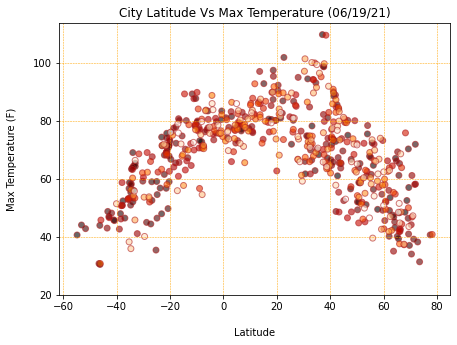

In [11]:
# Latitude vs. Temperature Plot
plt.figure(figsize=(7,5))
plt.scatter(plot_lat,plot_max_temp, c=plot_colors, cmap='gist_heat',  alpha=0.6, edgecolors="#b02121")

plt.ylim(20,plot_max_temp.max()+4)
#plt.ylim(plot_max_temp.min()-int(plot_max_temp.min()),plot_max_temp.max()+4)
plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Max Temperature (F)", labelpad=16)

plt.title (f"City Latitude Vs Max Temperature ({plot_date})")
#plt.colorbar()
plt.grid(color = 'orange', linestyle = '--', linewidth = 0.5)

plt.savefig("output_plots/city_lat_vs_max_temp.jpeg")
plt.savefig("output_plots/city_lat_vs_max_temp.png")
plt.show()


## Latitude vs. Humidity Plot

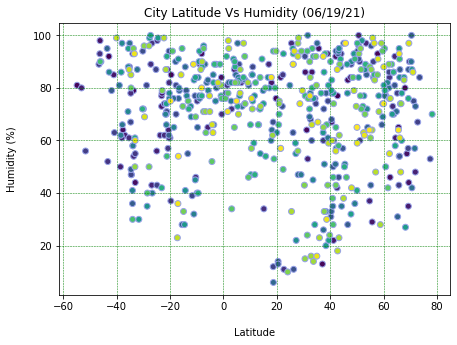

In [12]:
# Latitude vs. Humidity Plot
plt.figure(figsize=(7,5))
plt.scatter(plot_lat,plot_hum,c=plot_colors, cmap='viridis', edgecolors="#97a2e8")
#plt.ylim(20,100)
plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Humidity (%)", labelpad=16)

plt.title (f"City Latitude Vs Humidity ({plot_date})")
#plt.colorbar()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.savefig("output_plots/city_lat_vs_humidity.jpeg")
plt.savefig("output_plots/city_lat_vs_humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

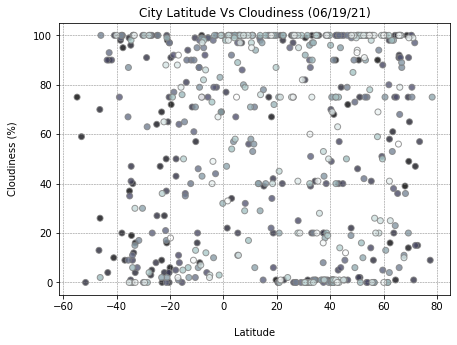

In [13]:
#Latitude vs. Cloudiness Plot
plt.figure(figsize=(7,5))
plt.scatter(plot_lat,plot_cloud, c=plot_colors, cmap='bone',  alpha=0.8, edgecolors="grey", marker="o")

#plt.ylim(20,110)
plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Cloudiness (%)", labelpad=16)

plt.title (f"City Latitude Vs Cloudiness ({plot_date})")
#plt.colorbar()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


plt.savefig("output_plots/city_lat_vs_cloudiness.jpeg")
plt.savefig("output_plots/city_lat_vs_cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

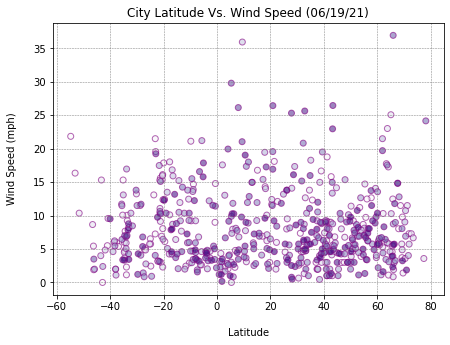

In [14]:
#Latitude vs. Cloudiness Plot
plt.figure(figsize=(7,5))
plt.scatter(plot_lat,plot_winds, c=plot_colors, cmap='Purples',  alpha=0.6, edgecolors="purple")

#plt.ylim(20,100)
plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Wind Speed (mph)", labelpad=16)

plt.title (f"City Latitude Vs. Wind Speed ({plot_date})")
#plt.colorbar()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig("output_plots/city_lat_vs_windspeed.jpeg")
plt.savefig("output_plots/city_lat_vs_windspeed.png")

plt.show()

## Linear Regression

In [15]:
NH_city_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
SH_city_data = clean_city_data.loc[clean_city_data["Lat"]<0]
NH_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,61.09,77,100,15.82,ES,1624133145
2,ostrovnoy,68.0531,39.5131,48.52,80,39,8.03,RU,1624133145
5,hilo,19.7297,-155.0900,80.26,76,1,3.00,US,1624132871
6,kodiak,57.7900,-152.4072,49.51,93,90,12.66,US,1624133147
8,tasiilaq,65.6145,-37.6368,39.36,65,100,4.59,GL,1624133147
...,...,...,...,...,...,...,...,...,...
570,gornopravdinsk,60.0500,69.9000,50.90,74,100,5.68,RU,1624133528
571,lavrentiya,65.5833,-171.0000,48.51,64,56,3.91,RU,1624133528
573,cayenne,4.9333,-52.3333,86.04,75,75,1.01,GF,1624133529
574,boli,45.7667,130.5167,53.04,97,12,4.34,CN,1624133529


In [16]:
NH_plot_colors   = np.arange(len(NH_city_data))
NH_plot_lat      = NH_city_data["Lat"]
NH_plot_max_temp = NH_city_data["Max Temp"]
NH_plot_hum      = NH_city_data["Humidity"]
NH_plot_cloud    = NH_city_data["Cloudiness"]
NH_plot_winds    = NH_city_data["Wind Speed"]

SH_plot_colors   = np.arange(len(SH_city_data))
SH_plot_lat      = SH_city_data["Lat"]
SH_plot_max_temp = SH_city_data["Max Temp"]
SH_plot_hum      = SH_city_data["Humidity"]
SH_plot_cloud    = SH_city_data["Cloudiness"]
SH_plot_winds    = SH_city_data["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = NH_plot_lat
y_values = NH_plot_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=NH_plot_colors, cmap='ocean_r',  alpha=0.7, edgecolors="#97a2e8")
plt.ylim(20,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="black", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(20,25),fontsize=15, color="#0b1902")

plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Max Temperature (F)", labelpad=16)
plt.title (f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/NH_city_lat_vs_temp_LR.jpeg")
plt.savefig("output_plots/NH_city_lat_vs_temp_LR.png")
plt.show()


NameError: name 'NH_plot_lat' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.820847285763224
The equation of regression line is: y = 0.85x + 83.43



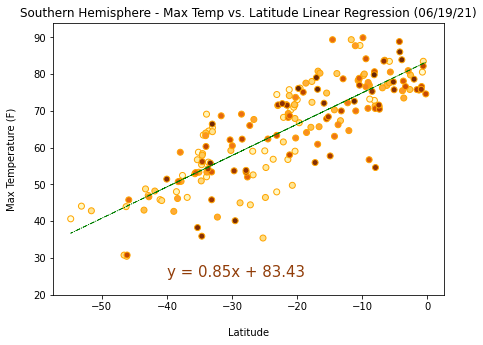

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = SH_plot_lat
y_values = SH_plot_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=SH_plot_colors, cmap='YlOrBr', edgecolors="orange")
plt.ylim(20,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="green", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(-40,25),fontsize=15, color="#913d09")

plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Max Temperature (F)", labelpad=16)
plt.title (f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/SH_city_lat_vs_temp_LR.jpeg")
plt.savefig("output_plots/SH_city_lat_vs_temp_LR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: -0.01283758287093052
The equation of regression line is: y = -0.01x + 70.6



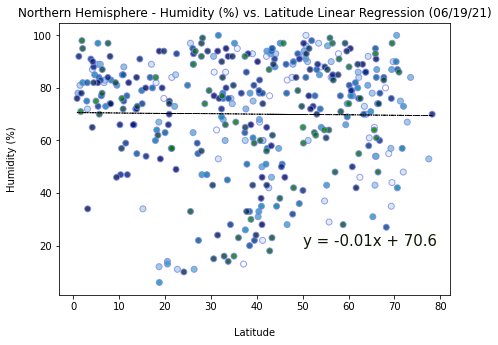

In [19]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = NH_plot_lat
y_values = NH_plot_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=NH_plot_colors, cmap='ocean_r',  alpha=0.8 , edgecolors="#7e85ec")
#plt.ylim(0,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="black", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(50,20),fontsize=15, color="#0b1902")

plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Humidity (%)", labelpad=16)
plt.title (f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/NH_city_lat_vs_hum_LR.jpeg")
plt.savefig("output_plots/NH_city_lat_vs_hum_LR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.013399082542398867
The equation of regression line is: y = 0.02x + 72.88



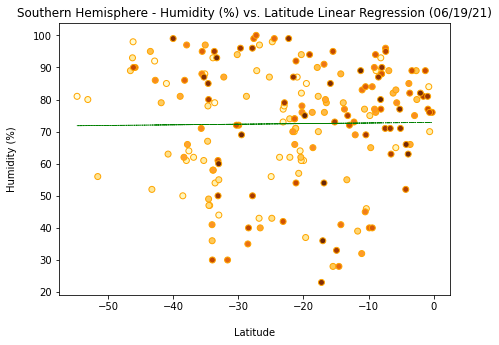

In [20]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = SH_plot_lat
y_values = SH_plot_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=SH_plot_colors, cmap='YlOrBr', edgecolors="orange")
#plt.ylim(20,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="green", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(-50,15),fontsize=15, color="#913d09")

plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Humidity (%)", labelpad=16)
plt.title (f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/SH_city_lat_vs_hum_LR.jpeg")
plt.savefig("output_plots/SH_city_lat_vs_hum_LR.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: -0.06447394649266087
The equation of regression line is: y = -0.13x + 63.48



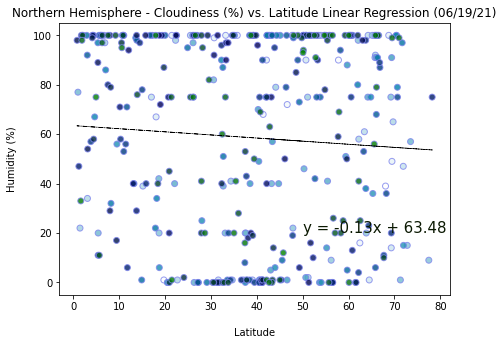

In [21]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = NH_plot_lat
y_values = NH_plot_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=NH_plot_colors, cmap='ocean_r',  alpha=0.8,  edgecolors="#7e85ec")
#plt.ylim(0,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="black", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(50,20),fontsize=15, color="#0b1902")

plt.xlabel("Latitude", labelpad=16)
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.ylabel("Humidity (%)", labelpad=16)
plt.title (f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/NH_city_lat_vs_cloud_LR.jpeg")
plt.savefig("output_plots/NH_city_lat_vs_cloud_LR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.09296892192837992
The equation of regression line is: y = 0.28x + 58.4



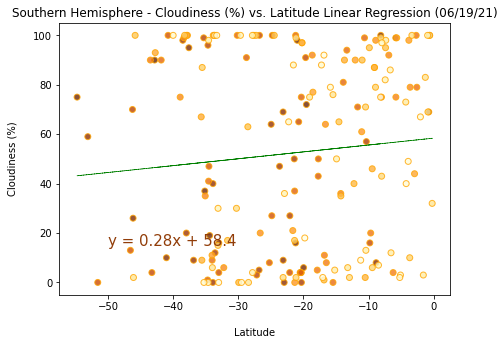

In [22]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = SH_plot_lat
y_values = SH_plot_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=SH_plot_colors, cmap='YlOrBr_r', alpha=0.8, edgecolors="orange")
#plt.ylim(20,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="green", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(-50,15),fontsize=15, color="#913d09")

plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Cloudiness (%)", labelpad=16)
plt.title (f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/SH_city_lat_vs_cloud_LR.jpeg")
plt.savefig("output_plots/SH_city_lat_vs_cloud_LR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: -0.027614770121401212
The equation of regression line is: y = -0.01x + 8.2



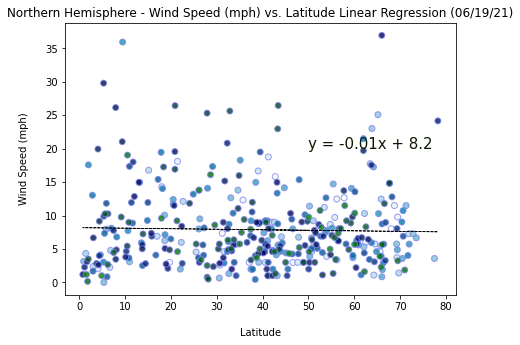

In [23]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = NH_plot_lat
y_values = NH_plot_winds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=NH_plot_colors, cmap='ocean_r',  alpha=0.8 , edgecolors="#7e85ec")
#plt.ylim(0,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="black", linestyle = '--', linewidth=0.75)
plt.annotate(line_eq,(50,20),fontsize=15, color="#0b1902")

plt.xlabel("Latitude", labelpad=16)
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.ylabel("Wind Speed (mph)", labelpad=16)
plt.title (f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/NH_city_lat_vs_winds_LR.jpeg")
plt.savefig("output_plots/NH_city_lat_vs_winds_LR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: 0.035980295896958926
The equation of regression line is: y = 0.01x + 8.31



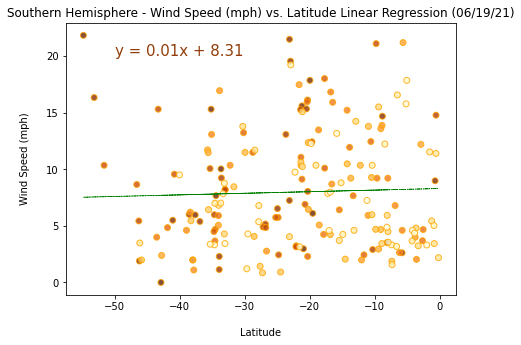

In [24]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Calculate linear regression model 

x_values = SH_plot_lat
y_values = SH_plot_winds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c=SH_plot_colors, cmap='YlOrBr_r',  alpha=0.8, edgecolors="orange")
#plt.ylim(20,y_values.max()+4)

plt.plot(x_values,regress_values,"r-", color="green", linestyle = '-.', linewidth=0.75)
plt.annotate(line_eq,(-50,20),fontsize=15, color="#913d09")

plt.xlabel("Latitude", labelpad=16)
plt.ylabel("Wind Speed (mph)", labelpad=16)
plt.title (f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({plot_date})")

# Print out the r-squared value along with the plot.
print(f"\nThe r-value is: {rvalue}")
print(f"The equation of regression line is: {line_eq}\n")

plt.savefig("output_plots/SH_city_lat_vs_winds_LR.jpeg")
plt.savefig("output_plots/SH_city_lat_vs_winds_LR.png")
plt.show()